In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('1900_2021_DISASTERS_INTERPOLATED.csv')

# View the dataset
df.head()

,Unnamed: 0,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,ISO,Region,Continent,...,No Injured,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Start Date,End Date,Rank
0,0,climatological,drought,drought,NaN,NaN,cabo verde,cpv,western africa,africa,...,1.157057e+06,2.121271e+08,1.018853e+07,2.121271e+08,5.111317e+07,1.553171e+08,3.221647,1900-07-15,1900-07-16,9601.0
1,1,climatological,drought,drought,NaN,NaN,india,ind,southern asia,asia,...,1.166939e+06,2.139388e+08,1.027555e+07,2.139388e+08,5.154972e+07,1.566437e+08,3.221647,1900-07-15,1900-07-16,9683.0
2,2,geophysical,earthquake,ground movement,NaN,NaN,guatemala,gtm,central america,americas,...,1.318426e+06,2.417113e+08,1.160947e+07,2.417113e+08,5.824165e+07,1.769784e+08,3.350513,1902-04-18,1902-04-18,10940.0
3,7,meteorological,storm,tropical cyclone,NaN,NaN,bangladesh,bgd,southern asia,asia,...,1.215141e+02,2.209527e+04,1.067194e+03,2.209527e+04,5.364080e+03,1.617936e+04,3.479379,1904-11-18,1904-11-18,1.0
4,9,geophysical,earthquake,ground movement,NaN,NaN,india,ind,southern asia,asia,...,1.331803e+06,2.441638e+08,1.172726e+07,2.441638e+08,5.883258e+07,1.787741e+08,3.479379,1905-04-04,1905-04-04,11051.0


In [3]:
df = df.dropna(axis=1)
df.columns

Index(['Unnamed: 0', 'Disaster Subgroup', 'Disaster Type', 'Country', 'ISO',
       'Region', 'Continent', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Timezone', 'Total Deaths',
       'No Injured', 'No Affected', 'No Homeless', 'Total Affected',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Start Date', 'End Date', 'Rank'],
      dtype='object')

In [4]:
df2 =df 
# One hot encode the categorical variables
#df_subgroup = pd.get_dummies(df['Disaster Subgroup'], prefix='Disaster Subgroup')
#df_type = pd.get_dummies(df['Disaster Type'], prefix='Disaster Type')
#df_country = pd.get_dummies(df['Country'], prefix='Country')
#df_ISO = pd.get_dummies(df['ISO'], prefix='ISO')
#df_region = pd.get_dummies(df['Region'], prefix='Region')
#df_continent = pd.get_dummies(df['Continent'], prefix='Continent')

# Concatenate the one hot encoded dataframes
#df_one_hot_encoded = pd.concat([df_subgroup, df_type, df_country, df_ISO, df_region, df_continent], axis=1)

# Convert the one hot encoded dataframe to a matrix
#matrix = df_one_hot_encoded.to_numpy()

# Display the matrix
#print(matrix)


In [5]:
df = pd.get_dummies(df, columns=['Disaster Subgroup','Country', 'Disaster Type', 'ISO', 'Region', 'Continent','Dis Mag Scale','Timezone'])
#df3 = pd.get_dummies(df, columns=['Disaster Subgroup', 'Disaster Type', 'ISO', 'Region', 'Continent','Dis Mag Scale','Timezone'])
#Creating a Label Encoder
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['Country']= le.fit_transform(df['Country'])

In [6]:

# Assuming your data is stored in a Pandas dataframe called "df"

# Select the features that you want to scale
features = df[['Dis Mag Value', 'Latitude', 'Longitude', 'Total Deaths',
       'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'CPI', 'Rank']]

# Iterate through each feature
for feature in features:
  # Select the feature
  col = df[feature]

  # Find the minimum and maximum values for the column
  min_value = col.min()
  max_value = col.max()

  # Subtract the minimum value from the column
  scaled_col = col - min_value

  # Divide by the range (max - min)
  scaled_col = scaled_col / (max_value - min_value)

  # Assign the scaled values to a new column in the dataframe
  df[f'scaled_{feature}'] = scaled_col


df.head

<bound method NDFrame.head of        Unnamed: 0  Aid Contribution  Dis Mag Value   Latitude  Longitude  \
0               0      5.293972e+07              1  16.000055 -24.008395   
1               1      5.339187e+07              1  22.351115  78.667743   
2               2      6.032294e+07              8  15.585555 -90.345759   
3               7      5.515770e+03            205  24.476929  90.293441   
4               9      6.093499e+07              8  22.351115  78.667743   
...           ...               ...            ...        ...        ...   
14931       16121      4.454193e+07              1  16.347124  47.891527   
14932       16122      5.467111e+07              1 -28.816624  24.991639   
14933       16123      7.229931e+07           2900  -2.981434  23.822264   
14934       16124      5.139031e+06              1  44.153412  20.551440   
14935       16125      4.255139e+07              1   7.869943  29.666790   

       Total Deaths    No Injured   No Affected   No Home

In [7]:

df



,Unnamed: 0,Aid Contribution,Dis Mag Value,Latitude,Longitude,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,...,scaled_Dis Mag Value,scaled_Latitude,scaled_Longitude,scaled_Total Deaths,scaled_No Injured,scaled_No Affected,scaled_No Homeless,scaled_Total Affected,scaled_CPI,scaled_Rank
0,0,5.293972e+07,1,16.000055,-24.008395,2.378395e+06,1.157057e+06,2.121271e+08,1.018853e+07,2.121271e+08,...,0.000004,0.539987,0.428283,0.642785,0.642785,0.642785,0.642785,0.642785,0.000000,0.642785
1,1,5.339187e+07,1,22.351115,78.667743,2.398708e+06,1.166939e+06,2.139388e+08,1.027555e+07,2.139388e+08,...,0.000004,0.599630,0.717217,0.648276,0.648276,0.648276,0.648276,0.648276,0.000000,0.648276
2,2,6.032294e+07,8,15.585555,-90.345759,2.710097e+06,1.318426e+06,2.417113e+08,1.160947e+07,2.417113e+08,...,0.000005,0.536095,0.241608,0.732441,0.732441,0.732441,0.732441,0.732441,0.001332,0.732441
3,7,5.515770e+03,205,24.476929,90.293441,2.487236e+02,1.215141e+02,2.209527e+04,1.067194e+03,2.209527e+04,...,0.000020,0.619594,0.749932,0.000000,0.000000,0.000000,0.000000,0.000000,0.002663,0.000000
4,9,6.093499e+07,8,22.351115,78.667743,2.737594e+06,1.331803e+06,2.441638e+08,1.172726e+07,2.441638e+08,...,0.000005,0.599630,0.717217,0.739873,0.739873,0.739873,0.739873,0.739873,0.002663,0.739873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14931,16121,4.454193e+07,1,16.347124,47.891527,2.001112e+06,9.735141e+05,1.784775e+08,8.572331e+06,1.784775e+08,...,0.000004,0.543247,0.630612,0.540810,0.540810,0.540810,0.540810,0.540810,1.000000,0.540810
14932,16122,5.467111e+07,1,-28.816624,24.991639,2.456180e+06,1.194899e+06,2.190647e+08,1.052174e+07,2.190647e+08,...,0.000004,0.119111,0.566171,0.663810,0.663810,0.663810,0.663810,0.663810,1.000000,0.663810
14933,16123,7.229931e+07,2900,-2.981434,23.822264,3.248152e+06,1.580182e+06,2.897001e+08,1.391438e+07,2.897001e+08,...,0.000227,0.361731,0.562880,0.877871,0.877871,0.877871,0.877871,0.877871,1.000000,0.877871
14934,16124,5.139031e+06,1,44.153412,20.551440,2.308794e+05,1.123202e+05,2.059186e+07,9.890388e+05,2.059186e+07,...,0.000004,0.804377,0.553676,0.062337,0.062337,0.062337,0.062337,0.062337,1.000000,0.062337


In [8]:
df2.columns

Index(['Unnamed: 0', 'Disaster Subgroup', 'Disaster Type', 'Country', 'ISO',
       'Region', 'Continent', 'Aid Contribution', 'Dis Mag Value',
       'Dis Mag Scale', 'Latitude', 'Longitude', 'Timezone', 'Total Deaths',
       'No Injured', 'No Affected', 'No Homeless', 'Total Affected',
       'Insured Damages ('000 US$)', 'Total Damages ('000 US$)', 'CPI',
       'Start Date', 'End Date', 'Rank'],
      dtype='object')

In [9]:
#X = df3.drop(['Total Deaths','Start Date','End Date','Rank'], axis=1)  
#y = df3['Total Deaths']
print(df.columns)

Index(['Unnamed: 0', 'Aid Contribution', 'Dis Mag Value', 'Latitude',
       'Longitude', 'Total Deaths', 'No Injured', 'No Affected', 'No Homeless',
       'Total Affected',
       ...
       'scaled_Dis Mag Value', 'scaled_Latitude', 'scaled_Longitude',
       'scaled_Total Deaths', 'scaled_No Injured', 'scaled_No Affected',
       'scaled_No Homeless', 'scaled_Total Affected', 'scaled_CPI',
       'scaled_Rank'],
      dtype='object', length=727)


In [10]:


# Assuming your data is stored in a Pandas dataframe called "df"

# Select the features that you want to scale
#features = df3[['Dis Mag Value', 'Latitude', 'Longitude', 'Total Deaths',
 #      'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'CPI', 'Rank']]

# Iterate through each feature
#for feature in features:
  # Select the feature
#  col = df3[feature]

  # Find the minimum and maximum values for the column
 # min_value = col.min()
 # max_value = col.max()

  # Subtract the minimum value from the column
 # scaled_col = col - min_value

  # Divide by the range (max - min)
 # scaled_col = scaled_col / (max_value - min_value)

  # Assign the scaled values to a new column in the dataframe
 # df3[f'scaled_{feature}'] = scaled_col
#df3.head

In [11]:
df.columns
print(df2.columns.values)
#df3.columns

['Unnamed: 0' 'Disaster Subgroup' 'Disaster Type' 'Country' 'ISO' 'Region'
 'Continent' 'Aid Contribution' 'Dis Mag Value' 'Dis Mag Scale' 'Latitude'
 'Longitude' 'Timezone' 'Total Deaths' 'No Injured' 'No Affected'
 'No Homeless' 'Total Affected' "Insured Damages ('000 US$)"
 "Total Damages ('000 US$)" 'CPI' 'Start Date' 'End Date' 'Rank']


In [12]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neighbors import KNeighborsClassifier

# # Load the data and split it into training and testing sets
# X = df2[['Aid Contribution', 'Dis Mag Value', 'Latitude', 'Longitude']]
# y = df2[['Year', 'Country']]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Standardize the data
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

# # Train a KNN classifier
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train)

# # Evaluate the model on the testing set
# accuracy = knn.score(X_test, y_test)
# print("Accuracy: ", accuracy)


In [13]:
# # Convert the 'Date' column to a datetime type
# df3['Start Date'] = pd.to_datetime(df3['Start Date'])

# # Extract the month from each date
# df3['Year'] = df3['Start Date'].dt.year

# #F
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Load the dataset and extract the input features and target variable
# #X = dfle[['ISO','Total Deaths','Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Timezone','Dis Mag Value','Dis Mag Scale','Aid Contribution','No Injured','No Affected','No Homeless','Total Affected','CPI']]
# #y = dfle['Country']

# X = df3.drop(['Total Deaths','Country','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
# #y = df3['Rank']
# y = F




# # Split the data into a training set and a test set
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Train a random forest classifier on the training set
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# # Make predictions on the test set
# y_pred = model.predict(X_test)

# # Evaluate the model's performance using accuracy
# acc = accuracy_score(y_test, y_pred)
# print("Accuracy: {:.2f}".format(acc))

In [25]:
# import necessary libraries
import numpy as np
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# select the features and target columns
X = df.drop(['Total Deaths','Start Date','End Date','Dis Mag Value'
             ,'Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
y = df[['Rank', 'scaled_Dis Mag Value']]

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the input data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define the model architecture
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))

model.add(Dense(2, activation='linear'))

# compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])

# train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, return_dict=True)
#print(f'Test loss: {test_loss:.4f}, Test MAE: {test_mae:.4f}')
#print('Test loss: {:.4f}, Test MAE: {:.4f}'.format(test_loss, test_mae))
print(test_loss)
print(test_mae)


# use the model to make predictions on new data
#new_data = np.array([[...]]) # replace with actual data
#predictions = model.predict(new_data)


Epoch 1/50
374/374 [==============================] - 1s 1ms/step - loss: 15440211.0000 - mae: 2541.2366
Epoch 2/50
374/374 [==============================] - 1s 1ms/step - loss: 759937.1875 - mae: 534.0903
Epoch 3/50
374/374 [==============================] - 1s 1ms/step - loss: 192002.7500 - mae: 176.6137
Epoch 4/50
374/374 [==============================] - 1s 2ms/step - loss: 100593.6562 - mae: 116.2761
Epoch 5/50
374/374 [==============================] - 1s 2ms/step - loss: 65353.6914 - mae: 90.2724
Epoch 6/50
374/374 [==============================] - 1s 1ms/step - loss: 47102.7695 - mae: 74.4208
Epoch 7/50
374/374 [==============================] - 1s 2ms/step - loss: 37303.9805 - mae: 64.3674
Epoch 8/50
374/374 [==============================] - 1s 2ms/step - loss: 30470.4902 - mae: 58.4748
Epoch 9/50
374/374 [==============================] - 1s 2ms/step - loss: 25915.8027 - mae: 54.4795
Epoch 10/50
374/374 [==============================] - 1s 2ms/step - loss: 21737.0254 - m

In [15]:
# ##Need to preprocess the data first

# # create a Pandas data frame with the input data for the new samples
# lol = pd.read_csv('2022_DISASTERS_TARGET.csv')


# # convert the data frame to a NumPy array
# new_data = lol.values

# # use the model to make predictions on the new data
# predictions = model.predict(new_data)


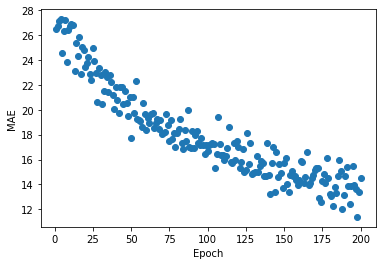

In [16]:
import matplotlib.pyplot as plt

# train the model
history = model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=0)

# extract the MAE values from the history
mae = history.history['mae']

# plot the MAE values
#plt.plot(mae)
#plt.xlabel('Epoch')
#plt.ylabel('MAE')
#plt.show()

# create a scatter plot with the epoch numbers on the x-axis and the MAE values on the y-axis
plt.scatter(range(1, len(mae) + 1), mae)
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.show()
##ITs gonna take some time


In [17]:
###Need to preprocess and work on the data below 
### Code above this works

In [18]:
# ##Need to preprocess the data first

# # create a Pandas data frame with the input data for the new samples
# lol = pd.read_csv('2022_DISASTERS_TARGET.csv')


# # convert the data frame to a NumPy array
# new_data = lol.values

# # use the model to make predictions on the new data
# predictions = model.predict(new_data)

In [19]:
from sklearn.linear_model import LinearRegression

##### Using label encoding
#X = merged.drop(columns =['Disaster Subgroup', 'Disaster Type','Country','ISO','Region','Continent'])
#y = dfle['Disaster Subgroup']
#X = dfle[['ISO', 'Region','Continent','Disaster Type']]

#X = dfle[['ISO', 'Disaster Subgroup','Continent','Timezone','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
#y = dfle['Country']

#X = dfle[['ISO','Country','Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Timezone','Dis Mag Value','Dis Mag Scale','Aid Contribution','No Injured','No Affected','No Homeless','Total Affected','CPI']]
#y = dfle['Total Deaths']

X = df.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
#y = df[ 'scaled_Dis Mag Value']
y = df[['Rank', 'scaled_Dis Mag Value']]

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1.0471140423169567e-16


In [20]:
## Trying to predict the accuracy but a regression model doesnt predict accuracy 

# Import the necessary libraries
#import tensorflow as tf
#import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import LabelEncoder

# Load the data
#X =dfle[['ISO', 'Region','Continent','Disaster Type']]
#y =  dfle['Disaster Subgroup']
#X = dfle[['ISO', 'Disaster Subgroup','Continent','Country','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
#y = dfle['Timezone']

X = df.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
y = df[['Rank', 'scaled_Dis Mag Value']]


# Encode the string feature as a numerical value
# Trying to convert string to a numerical Value for the nueral network to process
#encoder = LabelEncoder()
#X = encoder.fit_transform(X)
#y = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_logarithmic_error'])
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])


# Train the model
model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.2f}")

Epoch 1/40
299/299 [==============================] - 1s 2ms/step - loss: 37184432.0000 - accuracy: 0.0017 - val_loss: 37505416.0000 - val_accuracy: 0.0000e+00
Epoch 2/40
299/299 [==============================] - 0s 1ms/step - loss: 37184928.0000 - accuracy: 2.6156e-04 - val_loss: 37505416.0000 - val_accuracy: 0.0000e+00
Epoch 3/40
299/299 [==============================] - 0s 1ms/step - loss: 37184928.0000 - accuracy: 2.6156e-04 - val_loss: 37505416.0000 - val_accuracy: 0.0000e+00
Epoch 4/40
299/299 [==============================] - 0s 1ms/step - loss: 37184928.0000 - accuracy: 2.6156e-04 - val_loss: 37505416.0000 - val_accuracy: 0.0000e+00
Epoch 5/40
299/299 [==============================] - 0s 1ms/step - loss: 37184924.0000 - accuracy: 2.6156e-04 - val_loss: 37505416.0000 - val_accuracy: 0.0000e+00
Epoch 6/40
299/299 [==============================] - 0s 1ms/step - loss: 37184928.0000 - accuracy: 2.6156e-04 - val_loss: 37505416.0000 - val_accuracy: 0.0000e+00
Epoch 7/40
299/299 [

In [21]:

# from sklearn.preprocessing import OneHotEncoder

# # Select the categorical columns
# cat_cols = df2[['Disaster Subgroup', 'Disaster Type', 'Country', 'ISO', 'Region', 'Continent','Dis Mag Scale']]

# # Create the OneHotEncoder object
# onehot_encoder = OneHotEncoder(sparse=False)

# # One-hot encode the categorical columns
# onehot_encoded = onehot_encoder.fit_transform(df2[cat_cols])

# # Add the one-hot encoded columns to the original dataframe
# df2_onehot = pd.concat([df2, pd.DataFrame(onehot_encoded)], axis=1)

# # Drop the categorical columns
# df2_onehot = df2_onehot.drop(cat_cols, axis=1)


# # Display the resulting dataframe
# df2.head()


In [22]:
# from sklearn.preprocessing import MinMaxScaler

# # Select the numerical columns
# num_cols = ['Aid Contribution', 'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Total Deaths',
#             'No Injured', 'No Affected', 'No Homeless', 'Total Affected', 'Insured Damages ('000 US$)', 
#             'Total Damages ('000 US$)', 'CPI']

# # Create the MinMaxScaler object
# scaler = MinMaxScaler()

# # Scale the numerical columns
# df[num_cols] = scaler.fit_transform(df[num_cols])


In [23]:
## Not reliable for machine learning 
#Creating a Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [26]:
## Encdoign the Stuff using label 
#Changing categorical values to numerical values
dfle = pd.read_csv('1900_2021_DISASTERS_INTERPOLATED.csv')
dfle.Continent = le.fit_transform(dfle.Continent)
dfle.ISO= le.fit_transform(dfle.ISO)
dfle.Region= le.fit_transform(dfle.Region)
dfle['Disaster Type']= le.fit_transform(dfle['Disaster Subgroup'])
dfle['Disaster Subgroup']= le.fit_transform(dfle['Disaster Subgroup'])
dfle['Start Date']= le.fit_transform(dfle['Start Date'])
dfle['End Date']= le.fit_transform(dfle['End Date'])
dfle['Timezone']= le.fit_transform(dfle['Timezone'])
dfle['Country']= le.fit_transform(dfle['Country'])
dfle['Dis Mag Scale']= le.fit_transform(dfle['Dis Mag Scale'])

dfle.columns

Index(['Unnamed: 0', 'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'Disaster Subsubtype', 'Event Name', 'Country', 'ISO', 'Region',
       'Continent', 'Location', 'Origin', 'Associated Dis', 'Associated Dis2',
       'OFDA Response', 'Appeal', 'Declaration', 'Aid Contribution',
       'Dis Mag Value', 'Dis Mag Scale', 'Latitude', 'Longitude', 'Timezone',
       'River Basin', 'Total Deaths', 'No Injured', 'No Affected',
       'No Homeless', 'Total Affected', 'Insured Damages ('000 US$)',
       'Total Damages ('000 US$)', 'CPI', 'Start Date', 'End Date', 'Rank'],
      dtype='object')

In [ ]:
dfle.head()

In [ ]:
#print(df3.columns.values)


In [ ]:
# # Convert the 'Date' column to a datetime type
# df3['Start Date'] = pd.to_datetime(df3['Start Date'])

# # Extract the month from each date
# df3['Year'] = df3['Start Date'].dt.year

# F = df3[['Year','Longitude','Latitude']]
# #F 

In [ ]:
from sklearn.linear_model import LinearRegression

##### Using label encoding
#X = merged.drop(columns =['Disaster Subgroup', 'Disaster Type','Country','ISO','Region','Continent'])
#y = dfle['Disaster Subgroup']
#X = dfle[['ISO', 'Region','Continent','Disaster Type']]

#X = dfle[['ISO', 'Disaster Subgroup','Continent','Timezone','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
#y = dfle['Country']

X = dfle[['ISO','Country','Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Timezone','Dis Mag Value','Dis Mag Scale','Aid Contribution','No Injured','No Affected','No Homeless','Total Affected','CPI']]
y = dfle['Total Deaths']

#X = df3.drop(['Total Deaths'], axis=1)  
#y = df3['Total Deaths']

#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

In [29]:
# # Convert the 'Date' column to a datetime type
# df3['Start Date'] = pd.to_datetime(df3['Start Date'])

# # Extract the month from each date
# df3['Year'] = df3['Start Date'].dt.year

# F = df3[['Year','Longitude','Latitude']]
# #F
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset and extract the input features and target variable
#X = dfle[['ISO','Total Deaths','Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Timezone','Dis Mag Value','Dis Mag Scale','Aid Contribution','No Injured','No Affected','No Homeless','Total Affected','CPI']]
#y = dfle['Country']

X = dfle.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
y = dfle['Rank']




# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train a random forest classifier on the training set
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance using accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(acc))

ValueError: could not convert string to float: 'drought'

In [ ]:
dfle.head()

In [30]:
# Import the necessary libraries
#import tensorflow as tf
#import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#from sklearn.preprocessing import LabelEncoder

# Load the data
#X =dfle[['ISO', 'Region','Continent','Disaster Type']]
#y =  dfle['Disaster Subgroup']
#X = dfle[['ISO', 'Disaster Subgroup','Continent','Country','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
#y = dfle['Timezone']

X = dfle[['ISO','Country','Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Timezone','Dis Mag Value','Dis Mag Scale','Aid Contribution','No Injured','No Affected','No Homeless','Total Affected','CPI']]
y = dfle['Total Deaths']


# Encode the string feature as a numerical value
# Trying to convert string to a numerical Value for the nueral network to process
#encoder = LabelEncoder()
#X = encoder.fit_transform(X)
#y = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Build the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, batch_size=32)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.2f}")

C:\Users\umerf\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/20
299/299 [==============================] - 4s 1ms/step - loss: -32274016349716480.0000 - accuracy: 0.0000e+00 - val_loss: -192479921442914304.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
299/299 [==============================] - 0s 1ms/step - loss: -1561420860651208704.0000 - accuracy: 0.0000e+00 - val_loss: -4336401567059017728.0000 - val_accuracy: 0.0000e+00
Epoch 3/20
299/299 [==============================] - 0s 910us/step - loss: -11711835131349041152.0000 - accuracy: 0.0000e+00 - val_loss: -22879924379367505920.0000 - val_accuracy: 0.0000e+00
Epoch 4/20
299/299 [==============================] - 0s 987us/step - loss: -42817159818620436480.0000 - accuracy: 0.0000e+00 - val_loss: -69700799659883102208.0000 - val_accuracy: 0.0000e+00
Epoch 5/20
299/299 [==============================] - 0s 980us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/20
299/299 [==============================] - 0s 938us/step - loss: nan - accuracy: 0.000

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Assume you have a dataframe 'df' with columns 'feature1', 'feature2', ..., 'target'
# and a list of the column names of the features called 'feature_cols'

# Split the data into features and target
X = dfle[['ISO', 'Disaster Subgroup','Continent','Disaster Type','Latitude','Longitude','Region','Start Date','End Date']]
y = dfle['Timezone']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize the logistic regression model
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Use the 'predict' method to make predictions on the test data
predictions = logreg.predict(X_test)

# You can also use the 'predict_proba' method to predict the class probabilities
probabilities = logreg.predict_proba(X_test)

# Evaluate the model's performance on the test data using the 'accuracy_score' function from the 'sklearn.metrics' module
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Test accuracy: {accuracy:.2f}")

Test accuracy: 0.21


C:\Users\umerf\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# #Changing categorical values to numerical values
# dfle = df
# dfle.Continent = le.fit_transform(dfle.Continent)
# dfle.ISO= le.fit_transform(dfle.ISO)
# dfle.Region= le.fit_transform(dfle.Region)
# dfle['Disaster Type']= le.fit_transform(dfle['Disaster Subgroup'])
# dfle['Disaster Subgroup']= le.fit_transform(dfle['Disaster Subgroup'])
# dfle['Start Date']= le.fit_transform(dfle['Start Date'])
# dfle['End Date']= le.fit_transform(dfle['End Date'])
# dfle['Timezone']= le.fit_transform(dfle['Timezone'])
# dfle['Country']= le.fit_transform(dfle['Country'])
# dfle

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Load the data and split it into training and testing sets
X = dfle.drop(['Total Deaths','Start Date','End Date','Dis Mag Value','Total Deaths','No Injured','No Homeless','No Affected','Total Affected','Rank'], axis=1)  
#y = df3['Rank']
y = dfle['Rank']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform')
knn.fit(X_train, y_train)

# Evaluate the model on the testing set
accuracy = knn.score(X_test, y_test)
print("Accuracy: ", accuracy)

ValueError: could not convert string to float: 'tropical cyclone'